Answer 1

SVM is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates the classes in a high-dimensional space.


Answer 2

Hard Margin: Assumes data is linearly separable; no misclassification allowed.

Soft Margin: Allows some misclassification for better generalization; useful for noisy data.

Answer 3

SVM finds the hyperplane that maximizes the margin (distance between support vectors and hyperplane). It solves an optimization problem using:

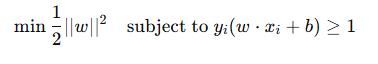



Answer 4

Used to convert the constrained optimization into an unconstrained one (via the Lagrangian), allowing efficient solving via quadratic programming.


Answer 5

They are data points that lie closest to the decision boundary. These points directly influence the hyperplane.

Answer 6

It is the implementation of SVM for classification tasks, as in sklearn.svm.SVC.

Answer 7

SVR is the regression variant of SVM. It tries to fit the best function within a margin of tolerance (epsilon).


Answer 8

The kernel trick allows SVM to operate in a high-dimensional space without explicitly computing the coordinates. It enables nonlinear classification.


Answer 9

Comparison of Kernels

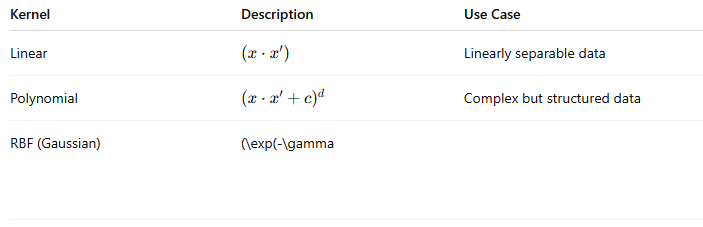




Answer 10

C controls trade-off between margin maximization and misclassification:

Low C: wider margin, more tolerance to errors.

High C: narrow margin, less tolerance, may overfit.



Answer 11

Gamma defines how far the influence of a training example reaches:

Low Gamma: far influence (smoother decision boundary)

High Gamma: near influence (may overfit)

Answer 12

It applies Bayes’ Theorem with the assumption that features are conditionally independent given the class label—hence "naïve".

Answer 13

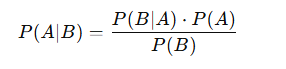




Answer 14


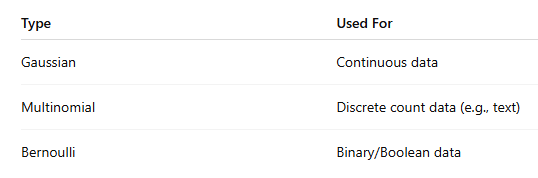

Answer 15

Use it when features are continuous and approximately normally distributed.

Answer 16

Features are conditionally independent.

No missing data.

Distribution of features matches the model type.


Answer 17

✅ Fast, simple, works well with high-dimensional data
❌ Assumption of independence is rarely true, not ideal for correlated features

Answer 18

Handles high-dimensional sparse data well

Fast and efficient with word frequencies


Answer 19

| Feature          | SVM                | Naïve Bayes              |
| ---------------- | ------------------ | ------------------------ |
| Accuracy         | Higher (usually)   | Moderate                 |
| Speed            | Slower             | Very fast                |
| Data Assumptions | No distributional  | Assumes distribution     |
| Robustness       | Robust to outliers | Sensitive to correlation |



Answer 20

Prevents zero probabilities for unseen features by adding 1 to the count:

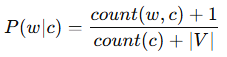

**Practical Questions**



In [1]:
#Answer 21

# Practical (also Theoretical) Question: Train an SVM Classifier on the Iris dataset and evaluate accuracy

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy


1.0

In [2]:
#Answer 22

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Linear Kernel SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
acc_linear = accuracy_score(y_test, svm_linear.predict(X_test))

# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
acc_rbf = accuracy_score(y_test, svm_rbf.predict(X_test))

print(f"Accuracy with Linear Kernel: {acc_linear:.2f}")
print(f"Accuracy with RBF Kernel: {acc_rbf:.2f}")


Accuracy with Linear Kernel: 0.98
Accuracy with RBF Kernel: 0.98


In [3]:
#Answer 23

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict and evaluate
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.3542


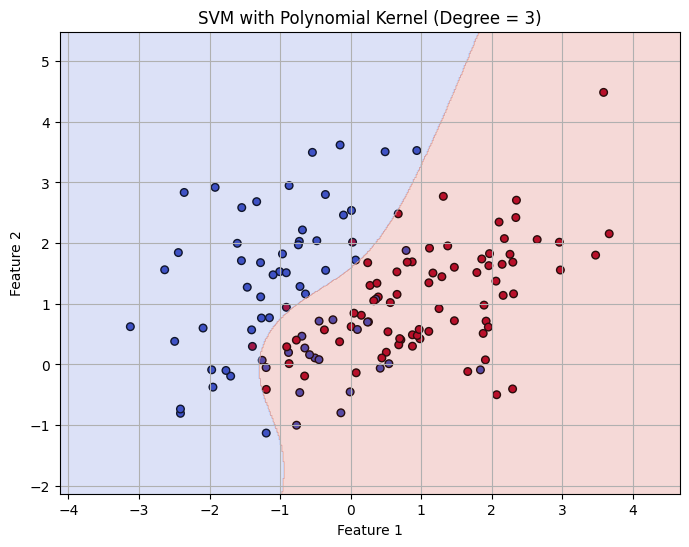

In [4]:
#Answer 24

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM with Polynomial Kernel
poly_svm = SVC(kernel='poly', degree=3, C=1)
poly_svm.fit(X_train, y_train)

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
plt.title("SVM with Polynomial Kernel (Degree = 3)")

# Plot data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=30, edgecolors='k')

# Create a grid to plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = poly_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [5]:
#Answer 25

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Gaussian Naive Bayes on Breast Cancer dataset: {accuracy:.4f}")


Accuracy of Gaussian Naive Bayes on Breast Cancer dataset: 0.9415


In [6]:
#Answer 26

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the 20 Newsgroups dataset (only a few categories for simplicity)
categories = ['alt.atheism', 'sci.space', 'comp.graphics', 'talk.religion.misc']
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Vectorize the text using Bag of Words (Count Vectorizer)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = mnb.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Multinomial Naive Bayes on 20 Newsgroups: {accuracy:.4f}")


Accuracy of Multinomial Naive Bayes on 20 Newsgroups: 0.8014


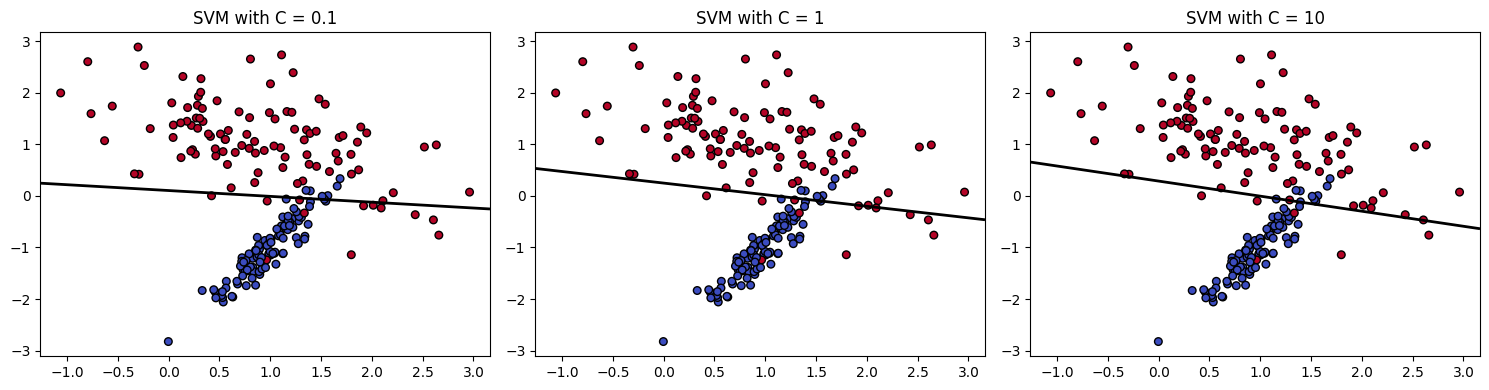

In [7]:
#Answer 27

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate a 2D synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different C values
C_values = [0.1, 1, 10]

# Plotting setup
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, C in enumerate(C_values):
    model = SVC(C=C, kernel='linear')
    model.fit(X_train, y_train)

    ax = axes[i]
    ax.set_title(f"SVM with C = {C}")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=30, edgecolors='k')

    # Create a meshgrid
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Draw decision boundary
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.tight_layout()
plt.show()


In [8]:
#Answer 28

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import numpy as np

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=0, n_classes=2, random_state=42)

# Binarize features (BernoulliNB expects binary features)
X_binary = (X > 0).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.3, random_state=42)

# Train Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Bernoulli Naive Bayes on binary dataset: {accuracy:.4f}")


Accuracy of Bernoulli Naive Bayes on binary dataset: 0.7333


In [9]:
#answer 29
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----------------------------
# 1. Train SVM without scaling
# ----------------------------
svm_unscaled = SVC(kernel='rbf')
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# --------------------------
# 2. Train SVM with scaling
# --------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf')
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# --------------------------
# Compare Results
# --------------------------
print("Accuracy without Scaling:", round(accuracy_unscaled, 4))
print("Accuracy with Scaling   :", round(accuracy_scaled, 4))


Accuracy without Scaling: 1.0
Accuracy with Scaling   : 1.0


In [10]:
#Answer 30

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Since MultinomialNB requires non-negative values, scale the features between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# -------------------------------
# 1. Without Laplace Smoothing (alpha=0)
# -------------------------------
model_no_smoothing = MultinomialNB(alpha=0.0)
model_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = model_no_smoothing.predict(X_test)
acc_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)

# -------------------------------
# 2. With Laplace Smoothing (alpha=1)
# -------------------------------
model_with_smoothing = MultinomialNB(alpha=1.0)
model_with_smoothing.fit(X_train, y_train)
y_pred_with_smoothing = model_with_smoothing.predict(X_test)
acc_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)

# -------------------------------
# Results
# -------------------------------
print("Accuracy without Laplace Smoothing (alpha=0):", round(acc_no_smoothing, 4))
print("Accuracy with Laplace Smoothing (alpha=1):   ", round(acc_with_smoothing, 4))


Accuracy without Laplace Smoothing (alpha=0): 0.9556
Accuracy with Laplace Smoothing (alpha=1):    0.9333


In [11]:
#Answer 31

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the SVM model
svm = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],   # Kernel coefficient
    'kernel': ['linear', 'rbf']       # Type of SVM kernel
}

# Create GridSearchCV object
grid = GridSearchCV(svm, param_grid, refit=True, verbose=1, cv=5, n_jobs=-1)

# Fit to training data
grid.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", grid.best_params_)

# Predict using the best model
y_pred = grid.predict(X_test)

# Evaluation
print("\nAccuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [12]:
#Answer 32

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Create an imbalanced binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------------
# 1. SVM without class weighting
# -------------------------------
svm_normal = SVC(kernel='rbf', random_state=42)
svm_normal.fit(X_train, y_train)
y_pred_normal = svm_normal.predict(X_test)

print("Without Class Weighting:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_normal), 4))
print(classification_report(y_test, y_pred_normal))

# --------------------------------
# 2. SVM with class_weight='balanced'
# --------------------------------
svm_weighted = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)

print("With Class Weighting:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_weighted), 4))
print(classification_report(y_test, y_pred_weighted))


Without Class Weighting:
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       270
           1       0.60      0.30      0.40        30

    accuracy                           0.91       300
   macro avg       0.76      0.64      0.68       300
weighted avg       0.89      0.91      0.90       300

With Class Weighting:
Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       270
           1       0.50      0.57      0.53        30

    accuracy                           0.90       300
   macro avg       0.73      0.75      0.74       300
weighted avg       0.91      0.90      0.90       300



In [13]:
#Answer 33

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample email dataset (can replace with a CSV or real dataset)
data = {
    'text': [
        "Win a free iPhone now", "Limited time offer!", "Call now to claim your prize",
        "Meeting at 10am", "Let's have lunch tomorrow", "Project deadline is tomorrow"
    ],
    'label': ['spam', 'spam', 'spam', 'ham', 'ham', 'ham']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Split into features and target
X = df['text']
y = df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text to numeric using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_counts, y_train)

# Predict on test data
y_pred = nb.predict(X_test_counts)

# Evaluate
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

         ham       0.00      0.00      0.00       0.0
        spam       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [14]:
#Answer 34

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------
# 1. SVM Classifier
# -----------------------
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# -----------------------
# 2. Naïve Bayes Classifier
# -----------------------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

# -----------------------
# Comparison Results
# -----------------------
print("SVM Accuracy        :", round(acc_svm, 4))
print("Naive Bayes Accuracy:", round(acc_nb, 4))

if acc_svm > acc_nb:
    print("\n✅ SVM performed better.")
elif acc_svm < acc_nb:
    print("\n✅ Naive Bayes performed better.")
else:
    print("\n⚖️ Both classifiers performed equally.")



SVM Accuracy        : 1.0
Naive Bayes Accuracy: 0.9778

✅ SVM performed better.


In [15]:
#Answer 35

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------------
# 1. Naive Bayes without feature selection
# -------------------------------
nb_full = GaussianNB()
nb_full.fit(X_train, y_train)
y_pred_full = nb_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# -------------------------------
# 2. Feature Selection (SelectKBest)
# -------------------------------
selector = SelectKBest(score_func=chi2, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train Naive Bayes on selected features
nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

# -------------------------------
# Comparison Results
# -------------------------------
print("Accuracy with All Features     :", round(acc_full, 4))
print("Accuracy with Selected Features:", round(acc_selected, 4))

if acc_selected > acc_full:
    print("\n✅ Feature selection improved performance.")
elif acc_selected < acc_full:
    print("\n📉 Feature selection reduced performance.")
else:
    print("\n⚖️ No change in performance after feature selection.")


Accuracy with All Features     : 0.9778
Accuracy with Selected Features: 1.0

✅ Feature selection improved performance.


In [16]:
#Answer 36

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------------------
# One-vs-Rest Strategy (OvR)
# ---------------------------
ovr_model = OneVsRestClassifier(SVC(kernel='rbf', gamma='scale'))
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

# ---------------------------
# One-vs-One Strategy (OvO)
# ---------------------------
ovo_model = OneVsOneClassifier(SVC(kernel='rbf', gamma='scale'))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

# ---------------------------
# Results Comparison
# ---------------------------
print("Accuracy using One-vs-Rest (OvR):", round(acc_ovr, 4))
print("Accuracy using One-vs-One (OvO): ", round(acc_ovo, 4))

if acc_ovr > acc_ovo:
    print("\n✅ OvR performed better.")
elif acc_ovr < acc_ovo:
    print("\n✅ OvO performed better.")
else:
    print("\n⚖️ Both OvR and OvO performed equally.")


Accuracy using One-vs-Rest (OvR): 0.7222
Accuracy using One-vs-One (OvO):  0.7963

✅ OvO performed better.


In [18]:
#answer 37

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define kernels to test
kernels = ['linear', 'poly', 'rbf']
accuracies = {}

# Train and evaluate SVM with each kernel
for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel:")
    # Only set the degree parameter for the 'poly' kernel
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, gamma='scale')
    else:
        # For other kernels, do not specify the degree parameter
        model = SVC(kernel=kernel, gamma='scale')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel] = acc

    print(f"Accuracy: {round(acc, 4)}")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

# Comparison summary
print("\n🔍 Accuracy Comparison:")
for kernel, acc in accuracies.items():
    print(f"{kernel.capitalize()} Kernel: {round(acc, 4)}")

best_kernel = max(accuracies, key=accuracies.get)
print(f"\n✅ Best performing kernel: {best_kernel.capitalize()}")


Training SVM with linear kernel:
Accuracy: 0.9766
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Training SVM with poly kernel:
Accuracy: 0.8947
              precision    recall  f1-score   support

   malignant       1.00      0.71      0.83        63
      benign       0.86      1.00      0.92       108

    accuracy                           0.89       171
   macro avg       0.93      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171


Training SVM with rbf kernel:
Accuracy: 0.9766
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                      

In [19]:
#answer 38

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

# Perform Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = SVC(kernel='rbf', gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Fold {fold} Accuracy: {round(acc, 4)}")

# Average accuracy
avg_accuracy = np.mean(accuracies)
print(f"\n✅ Average Accuracy: {round(avg_accuracy, 4)}")


Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 0.9667
Fold 3 Accuracy: 0.9
Fold 4 Accuracy: 1.0
Fold 5 Accuracy: 0.9

✅ Average Accuracy: 0.9533


In [20]:
#answer 39

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
class_labels = np.unique(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------
# 1. Naive Bayes with default priors (learned from data)
# -------------------------
nb_default = GaussianNB()
nb_default.fit(X_train, y_train)
y_pred_default = nb_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

print("Naive Bayes with Default Priors")
print("Accuracy:", round(acc_default, 4))
print(classification_report(y_test, y_pred_default, target_names=iris.target_names))

# -------------------------
# 2. Naive Bayes with uniform priors
# -------------------------
uniform_priors = [1/len(class_labels)] * len(class_labels)
nb_uniform = GaussianNB(priors=uniform_priors)
nb_uniform.fit(X_train, y_train)
y_pred_uniform = nb_uniform.predict(X_test)
acc_uniform = accuracy_score(y_test, y_pred_uniform)

print("Naive Bayes with Uniform Priors")
print("Accuracy:", round(acc_uniform, 4))
print(classification_report(y_test, y_pred_uniform, target_names=iris.target_names))

# -------------------------
# 3. Naive Bayes with custom priors (example skewed priors)
# -------------------------
custom_priors = [0.7, 0.2, 0.1]  # Example: Class 0 is more likely
nb_custom = GaussianNB(priors=custom_priors)
nb_custom.fit(X_train, y_train)
y_pred_custom = nb_custom.predict(X_test)
acc_custom = accuracy_score(y_test, y_pred_custom)

print("Naive Bayes with Custom Priors [0.7, 0.2, 0.1]")
print("Accuracy:", round(acc_custom, 4))
print(classification_report(y_test, y_pred_custom, target_names=iris.target_names))

# -------------------------
# Summary
# -------------------------
print("Summary of Accuracies:")
print(f"Default Priors: {acc_default:.4f}")
print(f"Uniform Priors: {acc_uniform:.4f}")
print(f"Custom Priors : {acc_custom:.4f}")


Naive Bayes with Default Priors
Accuracy: 0.9778
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Naive Bayes with Uniform Priors
Accuracy: 0.9778
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Naive Bayes with Custom Priors [0.7, 0.2, 0.1]
Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00 

In [21]:
#Answer 40

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------------------
# 1. Train SVM without feature selection
# ---------------------------
svm = SVC(kernel='linear')  # linear kernel recommended for RFE
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc_without_rfe = accuracy_score(y_test, y_pred)

# ---------------------------
# 2. Perform Recursive Feature Elimination (select top 2 features)
# ---------------------------
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=2)
rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train SVM on selected features
svm_rfe = SVC(kernel='linear')
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_with_rfe = accuracy_score(y_test, y_pred_rfe)

# ---------------------------
# Results
# ---------------------------
print(f"Accuracy without RFE: {acc_without_rfe:.4f}")
print(f"Accuracy with RFE (2 features): {acc_with_rfe:.4f}")

# Optional: show selected features mask
print("Selected features (True=selected):", rfe.support_)


Accuracy without RFE: 1.0000
Accuracy with RFE (2 features): 1.0000
Selected features (True=selected): [False False  True  True]


In [22]:
#Answer 41

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM Classifier
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate Precision, Recall, F1-Score (macro averaged for multi-class)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision (macro-average): {precision:.4f}")
print(f"Recall (macro-average):    {recall:.4f}")
print(f"F1-Score (macro-average):  {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Precision (macro-average): 1.0000
Recall (macro-average):    1.0000
F1-Score (macro-average):  1.0000

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [23]:
#answer 42

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities on test set
y_prob = model.predict_proba(X_test)

# Calculate Log Loss
loss = log_loss(y_test, y_prob)

print(f"Log Loss (Cross-Entropy Loss): {loss:.4f}")


Log Loss (Cross-Entropy Loss): 0.0490


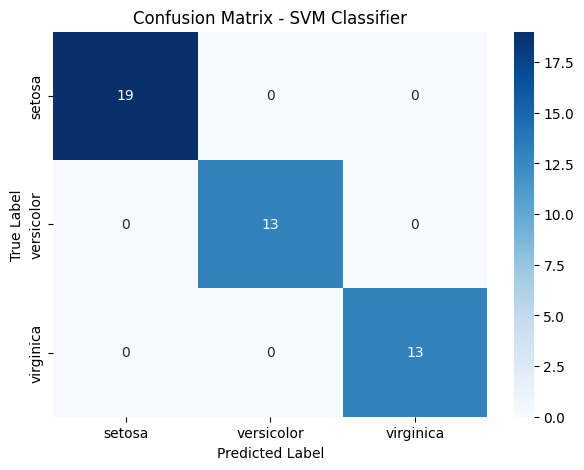


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [24]:
#Answer 43

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM classifier
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

# Optional: print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


In [26]:
#answer 44

from sklearn.datasets import fetch_california_housing # Changed from load_boston
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Load dataset (California housing)
housing = fetch_california_housing() # Changed to fetch_california_housing
X = housing.data
y = housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for SVR)
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Note: Scaling the target variable `y` can sometimes improve SVR performance,
# but it's not strictly necessary depending on the dataset and SVR parameters.
# For this example, we'll scale X only, which is more standard for input features.
# If scaling y was essential for the Boston dataset, you might need to adjust SVR parameters (like epsilon).
# For the California housing dataset, scaling X is usually sufficient.
# If you want to scale y as well, uncomment the following two lines and adjust the SVR code:
# scaler_y = StandardScaler()
# y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()


# Train SVR
# Parameters might need tuning for the new dataset
model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
# If you scaled y, train with y_train_scaled:
# model.fit(X_train, y_train_scaled)
model.fit(X_train, y_train) # Train with unscaled y

# Predict on test set
# If you scaled y, predict scaled and inverse transform:
# y_pred_scaled = model.predict(X_test)
# y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_pred = model.predict(X_test) # Predict unscaled y

# Evaluate with MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.3708


ROC-AUC Score: 1.0000


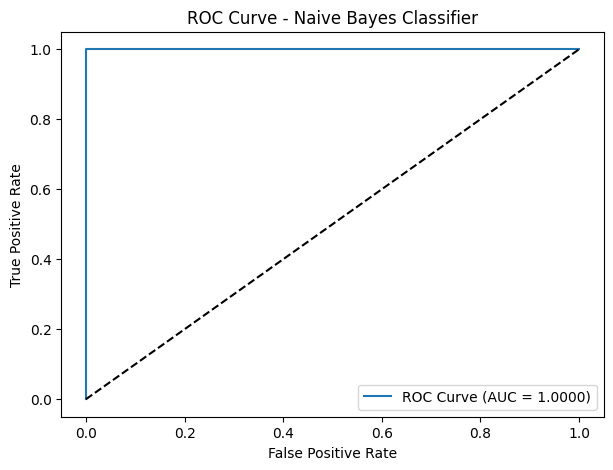

In [27]:
#Answer 45

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to binary classification: class 0 vs class 1 (setosa vs versicolor)
binary_filter = y != 2  # Remove class 2
X_binary = X[binary_filter]
y_binary = y[binary_filter]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Train Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities for positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()


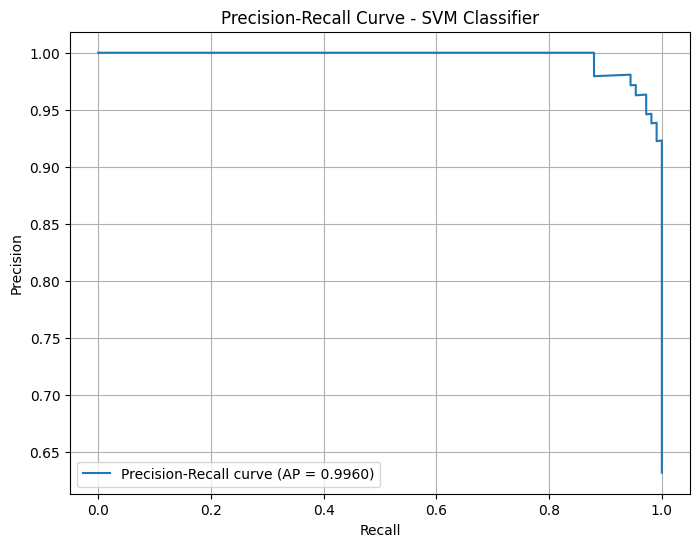

In [28]:
#Answer 46

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load binary classification dataset (Breast Cancer)
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM classifier with probability=False (default)
model = SVC(kernel='rbf', gamma='scale', probability=True)  # probability=True to get predict_proba
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Average precision score (area under PR curve)
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM Classifier')
plt.legend()
plt.grid(True)
plt.show()
